In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Généralités
### Accidents en france

In [5]:
df_accidents = pd.read_csv('base_accidents_2021_short.csv')

In [6]:
df_accidents

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,1,0,9,-1,0,1,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
1,1,1,1,1,0,9,-1,0,7,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
2,1,1,1,1,1,-1,-1,0,1,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
3,1,1,1,1,1,-1,-1,0,7,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
4,1,1,1,0,1,-1,-1,0,7,1983.0,...,1,1,1,0,1,49.242129,4.554546,14:20,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248056,1,1,1,0,0,-1,-1,0,7,1999.0,...,1,2,2,5,3,44.954275,-0.517921,10:55,1,3
248057,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248058,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248059,1,1,1,3,1,0,-1,-1,7,1985.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3


### Accidents en France Métropolitaine

In [7]:
df_acc=df_accidents.loc[df_accidents['lat']>0].loc[df_accidents['long']>-10]
df_acc

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,1,0,9,-1,0,1,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
1,1,1,1,1,0,9,-1,0,7,2000.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,3
2,1,1,1,1,1,-1,-1,0,1,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
3,1,1,1,1,1,-1,-1,0,7,1978.0,...,1,1,1,0,1,44.038958,4.348022,07:32,30,1
4,1,1,1,0,1,-1,-1,0,7,1983.0,...,1,1,1,0,1,49.242129,4.554546,14:20,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248056,1,1,1,0,0,-1,-1,0,7,1999.0,...,1,2,2,5,3,44.954275,-0.517921,10:55,1,3
248057,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248058,1,1,1,3,1,0,-1,-1,7,1968.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3
248059,1,1,1,3,1,0,-1,-1,7,1985.0,...,1,1,2,0,1,48.796670,2.050500,18:00,2,3


In [8]:
df_acc.describe()

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,...,vosp,prof,plan,surf,infra,situ,lat,long,jour,grav
count,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,229579.000000,...,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000,235003.000000
mean,1.735340,1.256929,1.261231,3.110667,1.801888,0.930265,-0.928099,-0.404667,12.215287,1983.023299,...,0.201134,1.220533,1.255822,1.261290,0.728046,1.364340,47.000711,2.719671,15.810211,2.456573
std,2.045344,0.520284,0.575583,2.777981,2.157313,2.969071,0.820318,0.958450,12.927930,18.259612,...,0.656934,0.529657,0.634640,0.796536,2.023466,1.268299,2.279232,2.509985,8.793314,1.400890
min,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1912.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,41.387696,-5.083341,1.000000,-1.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,7.000000,1970.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,44.948262,1.715060,8.000000,1.000000
50%,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,-1.000000,-1.000000,7.000000,1986.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,48.010917,2.409100,16.000000,3.000000
75%,1.000000,1.000000,2.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,10.000000,1998.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,48.865783,4.811570,23.000000,4.000000
max,10.000000,3.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2021.000000,...,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,51.057332,9.548023,31.000000,4.000000


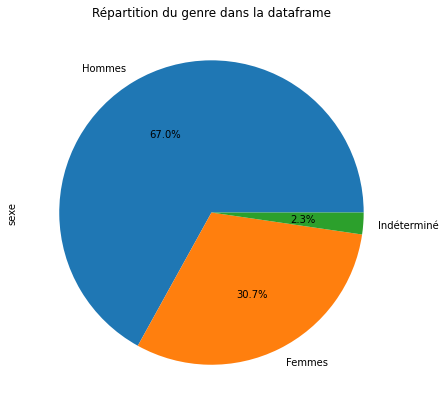

In [9]:
data = df_acc
data = data['sexe'].value_counts(normalize=True) * 100
data.plot.pie(title = 'Répartition du genre dans la dataframe',
       labels=['Hommes', 'Femmes', 'Indéterminé'],
       autopct='%1.1f%%',figsize = (7,7))

plt.show()

Les hommes sont 2x plus présents dans les accidents que les femmes  
On note aussi 2.3% de cas où le sexe n'est pas renseigné (cadavre non reconnaisable? )

### Filtres et ratio

In [10]:
df_acc[['heure','minute']] = df_acc.hrmn.str.split(":",expand=True,).astype(int)

filter_nuit =  (df_acc["heure"] < 5) | (df_acc["heure"] > 19)
filter_jour =  (df_acc["heure"] > 5) & (df_acc["heure"] < 19)
ratio_jour_nuit = df_acc[filter_jour].shape[0] / (df_acc[filter_nuit].shape[0])
print(ratio_jour_nuit)

filter_homme =  (df_acc["sexe"] == 1)
filter_femme =  (df_acc["sexe"] ==2 )
ratio_homme_femme = df_acc[filter_homme].shape[0] / (df_acc[filter_femme].shape[0]) 
print(ratio_homme_femme)

4.61921469480419
2.1788048294195836


Dans la base de données, on peut constater les proportions suivants :

Il y a 4.6x plus d'accidents le jour que la nuit, cela peut s'expliquer par le fait qu'il y'a plus de trafic le jour que la nuit et que la partie jour dure plus longtemps.
Il y a 2x plus d'hommes enregistré dans un accidents que de femmes, nous ne pouvons pas réellement savoir le pourquoi du comment mais deux principales hypothèses s'offrent à nous, un plus grand nombre de conducteurs mâles, les hommes seraient moins prudents que les femmes.
Par soucis de non proportionnalité, nous utiliseront ces ratios pour avoir autant de d'un facteur que d'un autre lorsque nécessaire.

[Text(0.5, 1.0, "Nombre d'accident en France"),
 Text(0.5, 0, 'longitude'),
 Text(0, 0.5, 'latitude')]

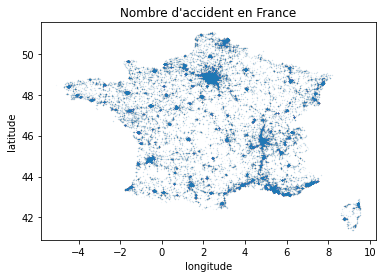

In [11]:
fig, ax = plt.subplots()

z = ax.scatter(data =df_acc, 
               x='long', y='lat', 
               alpha=0.2,s=0.01)

ax.set(title="Nombre d'accident en France", xlabel='longitude', ylabel='latitude')

Les accidents se font majoritairement a proximité des grandes villes cependant on peut voir que mis a part pour la diagonale du vide et les grandes villes la répartition des accident sur le territoire francais est plutot uniforme

# Accidents selon l'âge

In [12]:
abs(2021 -df_acc['an_nais'].mean())

37.976700830651

L'âge moyen de ceux impliqués dans un accidents de voiture est de 38 ans.

<AxesSubplot:>

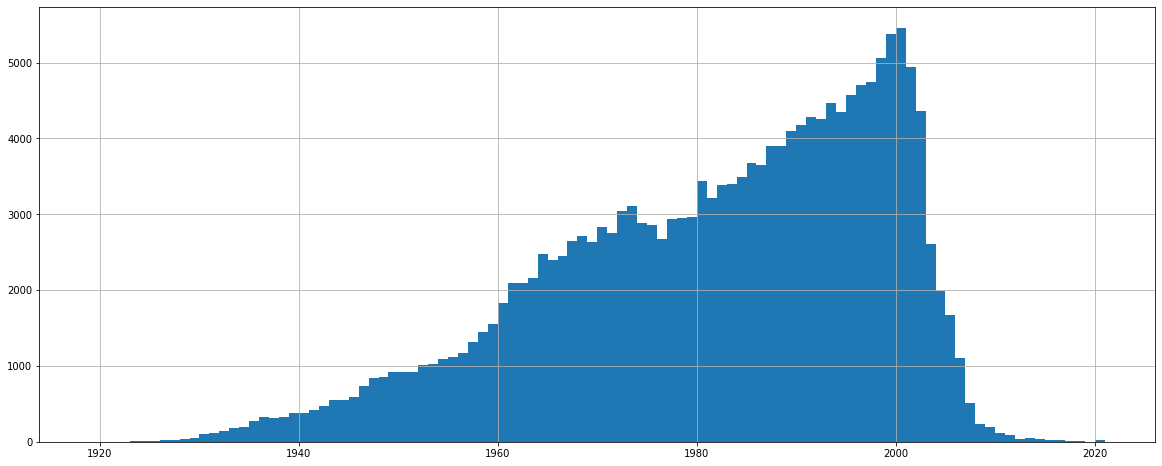

In [13]:
df_acc["an_nais"].loc[df_acc["catu"]==1].hist(bins=102,figsize=(20,8))

Même si la moyenne d'âge des conducteurs accidenté est de 38ans, on remarque que les conducteurs les plus imprudents sont les plus jeunes, on le vois bien avec la courbe qui ne fait que augmenter.<br>
Mais aussi, sachant que la dataframe reprend les données de 2021 et que le droit de circuler en voiture s'obtient à partir de 16 ans et le BSR a 14 ans on peut remarquer que même si c'est faible certains accidents sont fait alors que aucun de ces permis n'a été accordé <br>
~~Fun fact il y a eu un accident avec un nourisson de 1 an ou moins en tant que conducteur~~

<AxesSubplot:>

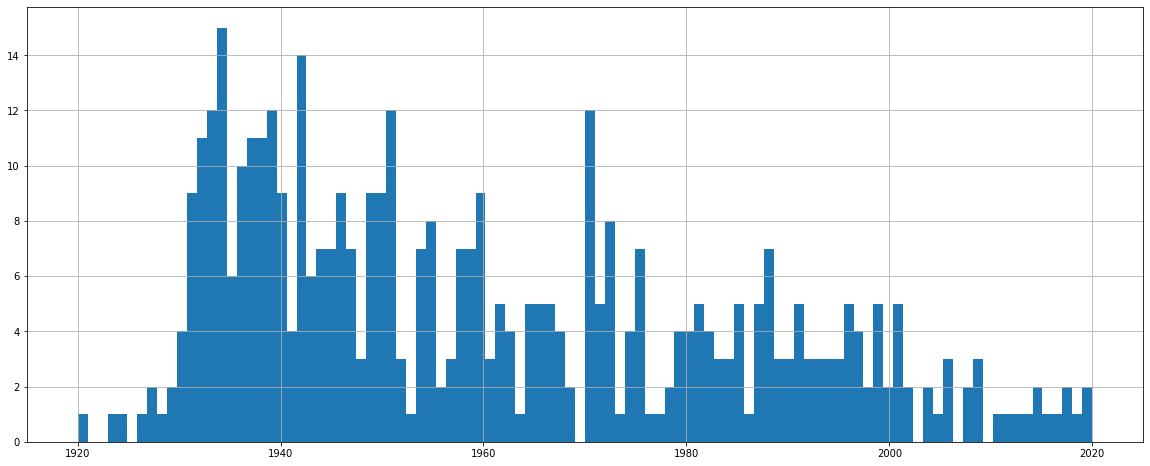

In [14]:
df_acc["an_nais"].loc[df_acc["catu"]==3].loc[df_acc["grav"]==2].hist(bins=102,figsize=(20,8))

Comme dans le code de la route, les piétons les plus à risques sont les personnes âgées


<AxesSubplot:>

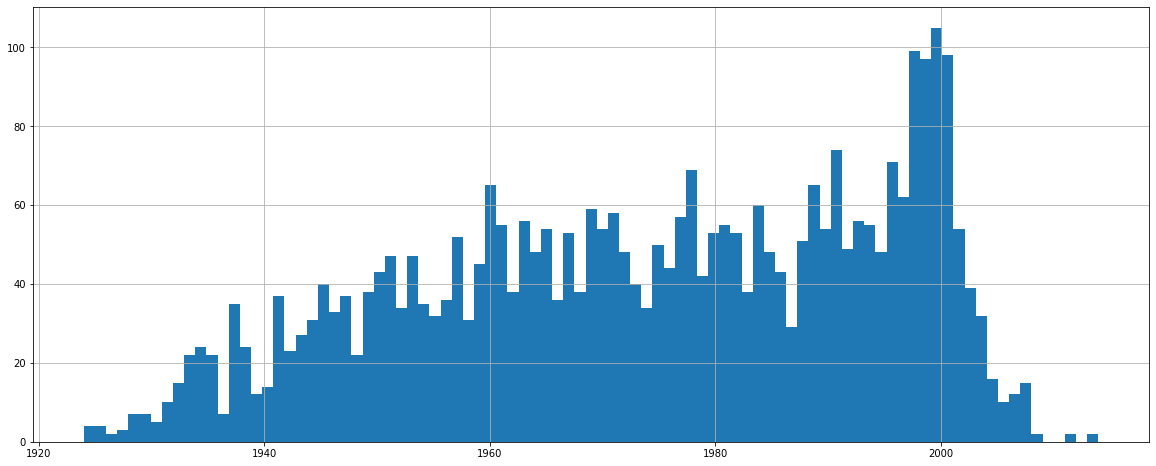

In [15]:
df_acc["an_nais"].loc[df_acc["catu"]==1].loc[(df_acc["grav"]==2) ].hist(bins=91,figsize=(20,8))

La répartition des conducteurs morts en fonction du l'année de naissance est distribués plus équitablment, cependant on remarque un pic vers les années 2000 qui correspond aux jeunes conducteurs venant d'avoir leur permis.

# Accident selon la période

In [16]:
reveillon = df_acc["place"].loc[df_acc["jour"] == 24].loc[df_acc["mois"] == 12].count()
noel = df_acc["place"].loc[df_acc["jour"] == 25].loc[df_acc["mois"] == 12].count()
fnationnal = df_acc["place"].loc[df_acc["jour"] == 14].loc[df_acc["mois"] == 7].count()
moyenne = df_acc["place"].count() /365

print("Réveillon du 24/12 :", reveillon)
print("Jour de noël : ",noel)
print("Fête nationnal :",fnationnal)
print("Moyenne", moyenne)

Réveillon du 24/12 : 407
Jour de noël :  326
Fête nationnal : 586
Moyenne 643.8438356164384


In [17]:
import datetime
mydate = datetime.datetime.now()
mydate.strftime("%B")
mydate

datetime.datetime(2023, 1, 2, 20, 35, 48, 875849)

In [18]:
import calendar

grouped = df_acc.groupby("mois")

print('Mois \t | Pourcentage | Nombre brut')
for name, group in grouped:
    print(calendar.month_name[name],"\t| ", round(group["place"].count() / df_acc["place"].count(),8)," | ",group["place"].count())

Mois 	 | Pourcentage | Nombre brut
January 	|  0.06311409  |  14832
February 	|  0.05907159  |  13882
March 	|  0.07030123  |  16521
April 	|  0.06264175  |  14721
May 	|  0.08712229  |  20474
June 	|  0.10486675  |  24644
July 	|  0.09725408  |  22855
August 	|  0.08445424  |  19847
September 	|  0.10065403  |  23654
October 	|  0.10303273  |  24213
November 	|  0.08508402  |  19995
December 	|  0.0824032  |  19365


Résultat: presque 2 fois moins d'accident en Février qu'en Juin ou Octobre.

Hypothèse: Peut être car Février a moins de jour que Juin et Octobre, ou bien les départs en vacances d'été et les retours

# Implication des accidents

In [17]:
from enum import Enum

class Person(Enum) :
    Conducteur = 1
    Passager = 2
    Piéton = 3
    
lst =    ["Conducteur",
    "Passager",
    "Piéton"]


for i,row in enumerate(df_acc['catu'].value_counts(normalize=True)*100) :
    print("{:.2f} %".format(row), lst[i])

78.30 % Conducteur
17.72 % Passager
3.99 % Piéton


Pour des accidents routiers, 18% des accidents impliquent des passagers et 4% des piétons.  
Quels est la gravité pour chaque cas ?

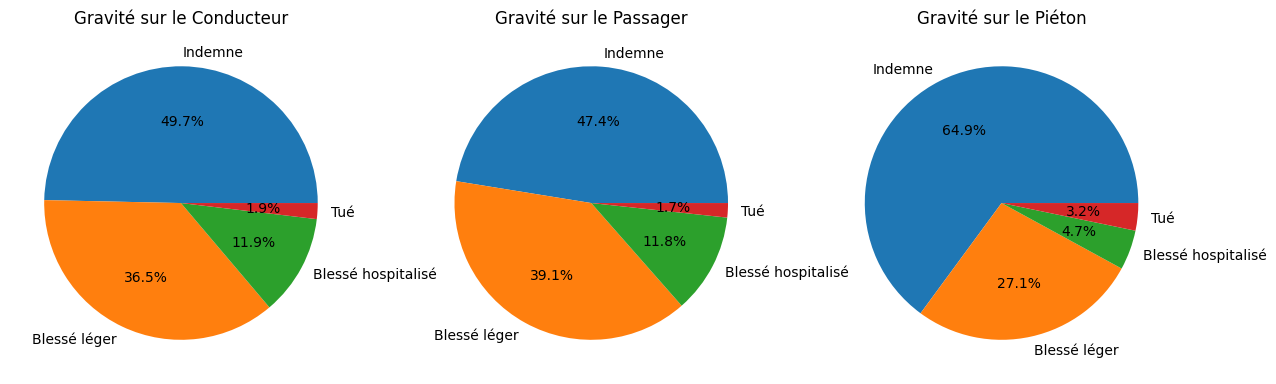

In [18]:
labels=['Indemne','Blessé léger','Blessé hospitalisé','Tué']
type=['Conducteur','Passager','Piéton']

fig, axes = plt.subplots(ncols=3, figsize=(15,8))

i= 1
df_no_unknown = df_acc[df_acc['grav'] != -1] #Retire les cas non renseignés
for ax in axes:
    
    df_tmp = df_no_unknown.loc[df_no_unknown['catu'] == i]
    ax.pie(df_tmp["grav"].value_counts(normalize=True) * 100, labels= labels,
       autopct='%1.1f%%')
    ax.title.set_text("Gravité sur le "+type[i-1])
    i+=1
plt.show()

On a la majorité des piétons indemnes avec un nombre de 64.9%, est-ce une
 bonne proportion ? On ne sait pas mais comparé à ceux dans le véhicule, c'est meilleur.  
Malheureusement, les piétons restent les plus en dangers de morts dans un accident.

Je cherche à savoir quel étaient les conditions visuels lors de l'accident.   
On trouve ces nombres ci-dessous pour l'état de l'éclairage où l'accident s'est produit :  


# Conditions de circulation

In [19]:
lst =    ["Plein jour","Crépuscule ou aube","Nuit sans éclairage public","Nuit avec éclairage public non allumé","Nuit avec éclairage public allumé",]

for i,row in enumerate(df_acc["lum"].value_counts()) :
    print(row,"\t", lst[i])
    
print("\n",df_acc.loc[df_acc["lum"] > 2]["lum"].value_counts().sum(), "\tTotal pendant la Nuit")

165781 	 Plein jour
31107 	 Crépuscule ou aube
21088 	 Nuit sans éclairage public
15302 	 Nuit avec éclairage public non allumé
1725 	 Nuit avec éclairage public allumé

 53920 	Total pendant la Nuit


### Accident la nuit avec et/ou sans lumiere?

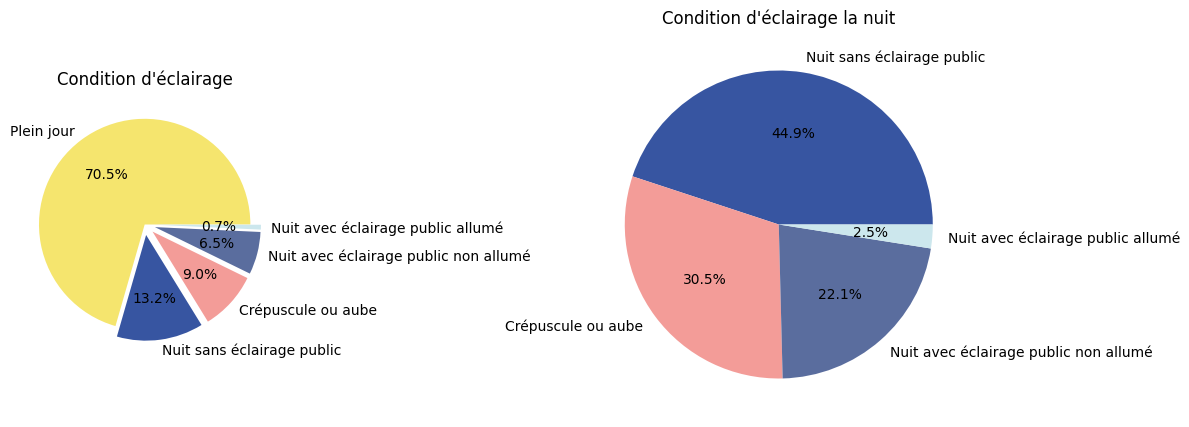

In [20]:

labels=['Plein jour','Nuit sans éclairage public','Crépuscule ou aube','Nuit avec éclairage public non allumé','Nuit avec éclairage public allumé']
colors = ['#F5E56E','#3755A1','#F39C98','#5A6D9E',"#CCE7ED"]
##F5E56E
#FA6362

fig, axes = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 6]}, figsize=(15,5))
ax = axes[0]
ax.pie(df_acc["lum"].value_counts(normalize=True) * 100, labels= labels, explode=[0,0.1,0.1,0.1,0.1],
       autopct='%1.1f%%', colors=colors, )
ax.title.set_text("Condition d'éclairage")
labels = labels[1:]


ax = axes[1]
ax.pie(df_acc.loc[df_acc["lum"]!=1]["lum"].value_counts(normalize=True) * 100,
       labels = labels,
       autopct='%1.1f%%', colors=colors[1:])
ax.title.set_text("Condition d'éclairage la nuit")
plt.show()

La majorité des accidents se produisant en plein jour s'explique par le simple fait que nous, êtres humains, vivons dans une société active le jour, donc avec plus beaucoup plus de trafic.   
De façon étonnante, il y a 1.5x plus d'accidents la nuit lorsque l'éclairage est allumé que si elle ne l'était pas.  
Mais alors pourquoi ?

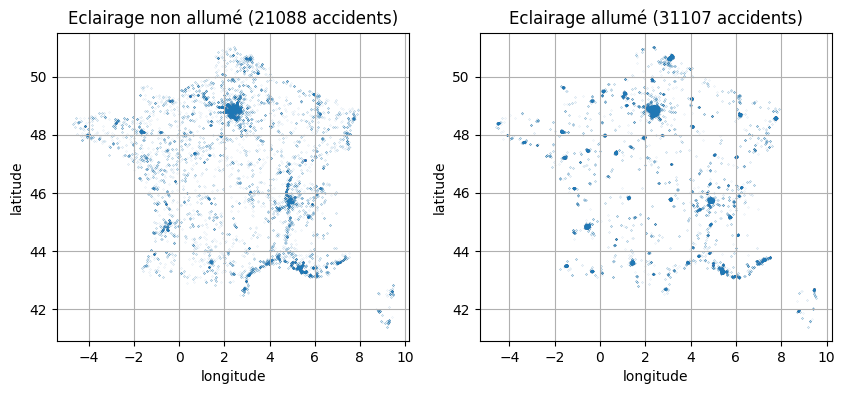

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.scatter(data = df_acc.loc[ (df_acc["lum"] == 3)], 
               x='long', y='lat', 
               alpha=0.5, s =0.01)
ax.grid()
ax.set(title='Eclairage non allumé (21088 accidents)', xlabel='longitude', ylabel='latitude')

ax = axs[1]
ax.scatter(data = df_acc.loc[df_acc["lum"] == 5], 
               x='long', y='lat', 
               alpha=0.5, s =0.01)
ax.grid()
ax.set(title='Eclairage allumé (31107 accidents)', xlabel='longitude', ylabel='latitude')

print()

Même si la répartition a l'air normale à première vue, il y a 1 détail étrange.
Il y a 1.5x plus d'accident la nuit lorsque les lumières sont activés que lorsqu'il n'y a pas d'éclairage allumé.

Mais pourtant dans ce dernier cas, les accidents sont clairement plus épars sur toutes la France malgré leur plus petit nombre.
Tout d'abord, un facteur important est que, ces lieux éclairés sont forts en densités de populations et donc un plus fort traffic. Sur l'entiéreté de la France, il y a plus de lieu sans éclairage qu'avec.

#### Conditions de circulation climatique / Atmospherique

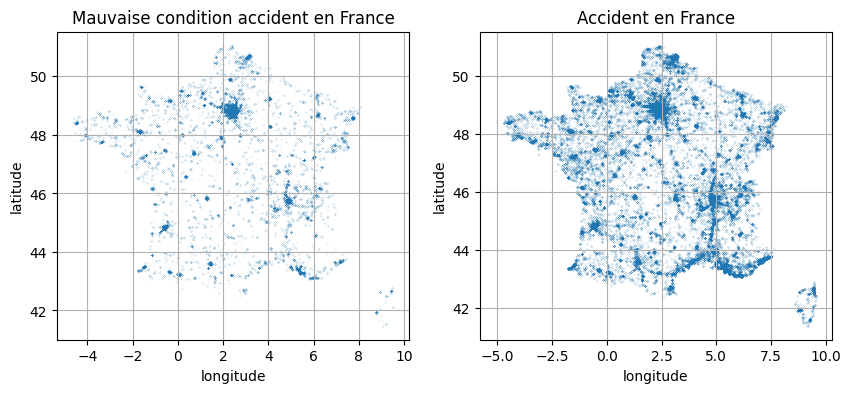

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.scatter(data = df_acc.loc[(df_acc["atm"] > 1) & (df_acc["atm"] < 8)], 
               x='long', y='lat', 
               alpha=0.3, s =0.01)
ax.grid()

ax.set(title='Mauvaise condition accident en France', xlabel='longitude', ylabel='latitude')

ax = axs[1]
ax.scatter(data = df_acc, 
                          x='long', y='lat',
               alpha=0.3, s =0.01)
ax.grid()
ax.set(title='Accident en France', xlabel='longitude', ylabel='latitude')
print()

On remarque pas de changement important, donc on en conclut que la condition atmosphérique n'est pas un facteur important causant les accidents en France.

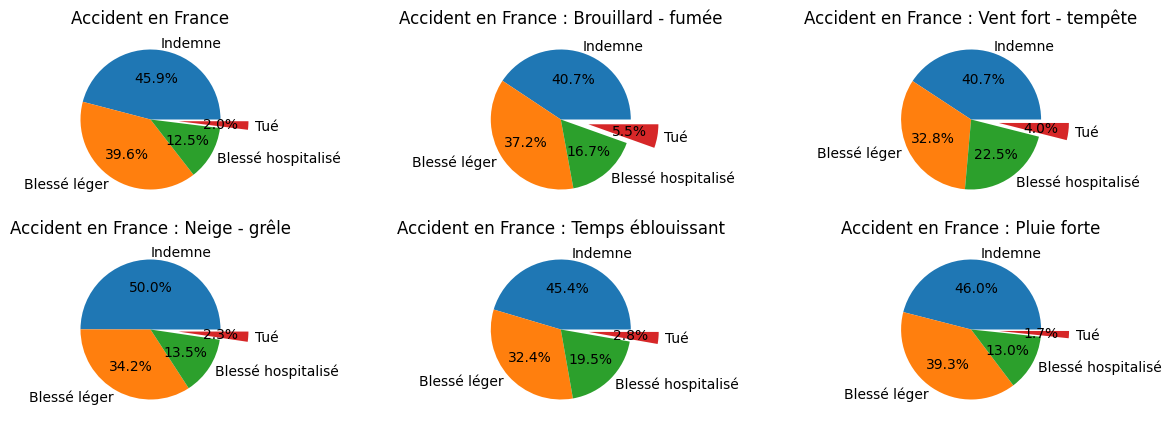

In [23]:


labels=['Indemne','Blessé léger','Blessé hospitalisé','Tué']
colors = ['#F5E56E','#3755A1','#F39C98','#5A6D9E',"#CCE7ED"]

fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,5))

ax = axes[0][0]
data = df_acc.loc[df_acc["grav"] != -1]

ax.pie(data['grav'].value_counts(normalize=True) * 100,
       labels = labels,  explode=[0,0,0,0.4],
       autopct='%1.1f%%')
ax.title.set_text("Accident en France")

ax = axes[0][1]
data = df_acc.loc[(df_acc["atm"] == 5)  & (df_acc["grav"] != -1)]
ax.pie(data['grav'].value_counts(normalize=True) * 100, labels= labels, explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Accident en France : Brouillard - fumée")

ax = axes[0][2]
data = df_acc.loc[(df_acc["atm"] == 6)  & (df_acc["grav"] != -1)]
ax.pie(data['grav'].value_counts(normalize=True) * 100, labels= labels, explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Accident en France : Vent fort - tempête")

ax = axes[1][0]
data = df_acc.loc[(df_acc["atm"] == 4)  & (df_acc["grav"] != -1)]
ax.pie(data['grav'].value_counts(normalize=True) * 100, labels= labels, explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Accident en France : Neige - grêle")

ax = axes[1][1]
data = df_acc.loc[(df_acc["atm"] == 7)  & (df_acc["grav"] != -1)]
ax.pie(data['grav'].value_counts(normalize=True) * 100, labels= labels, explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Accident en France : Temps éblouissant")

ax = axes[1][2]
data = df_acc.loc[(df_acc["atm"] == 3)  & (df_acc["grav"] != -1)]
ax.pie(data['grav'].value_counts(normalize=True) * 100, labels= labels, explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Accident en France : Pluie forte")

Les accidents ne sont pas forcément influencées par les conditions atmosphériqué, cependant on remarque une légère augmentation des accidents à gravité élevé lorsque la visibilité est faible ou bien lors de tempête ou vent fort.  

# Les accidents routiers français en 3 petit schéma

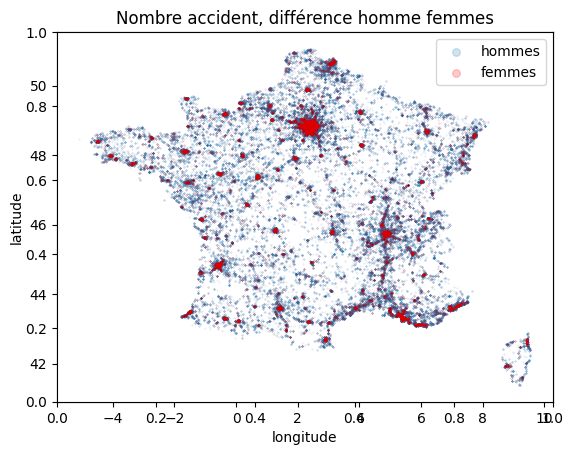

In [63]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111)


ax.scatter(data =df_acc.loc[df_acc['sexe']==1], 
               x='long', y='lat',
               alpha=0.2,s=0.1,label='hommes')
ax.scatter(data =df_acc.loc[df_acc['sexe']==2], 
               x='long', y='lat', 
               alpha=0.2,s=0.01,c='red',label='femmes')

ax.set(title='Nombre accident, différence homme femmes', xlabel='longitude', ylabel='latitude')
lgnd = ax.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.show()

Il y a moins de femmes qui font des accidents sur les routes de campagnes / routes moins empruntées

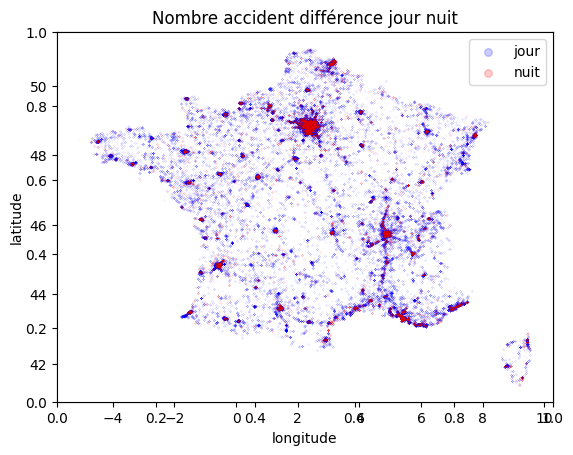

In [67]:

fig, ax = plt.subplots()
ax = fig.add_subplot(111)

ax.scatter(data =df_acc.loc[(df_acc["heure"] > 5) & (df_acc["heure"] < 19)  ], 
               x='long', y='lat',
               alpha=0.2,s=0.01, c = 'blue',label='jour')

ax.scatter(data =df_acc.loc[(df_acc["heure"] < 5) | (df_acc["heure"] > 19) ], 
               x='long', y='lat',
               alpha=0.2,s=0.01, c= 'red',label='nuit')
ax.set(title='Nombre accident différence jour nuit', xlabel='longitude', ylabel='latitude')
lgnd = ax.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.show()

Les accidents qui occurent pendant la nuit se produisent majoritairement dans les grandes villes, alors que le jour les accidents sont bien plus répartis 

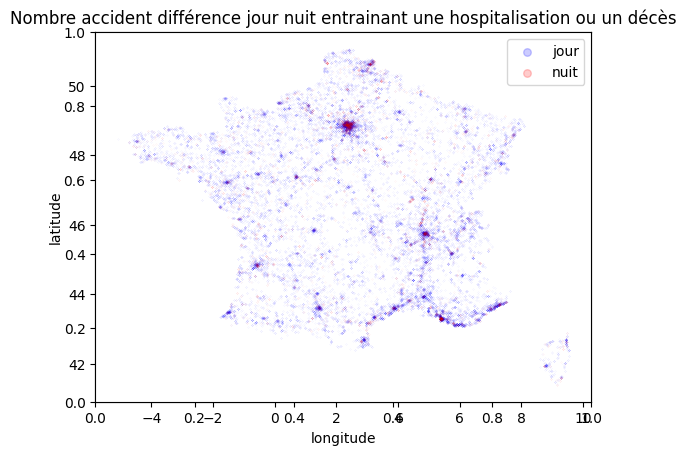

In [68]:
df_acc_grav2_nuit = df_acc.loc[(df_acc['grav'] ==3) | (df_acc['grav'] ==2)].loc[(df_acc['heure'] > 20) | (df_acc['heure'] < 5)]
df_acc_grav2_jr =df_acc.loc[(df_acc['grav'] ==3) | (df_acc['grav'] ==2)].loc[(df_acc['heure'] < 20) & (df_acc['heure'] > 5)]
fig, ax = plt.subplots()
ax = fig.add_subplot(111)

ax.scatter(data =df_acc_grav2_jr, 
               x='long', y='lat',
               alpha=0.2,s=0.01, c= 'blue',label='jour')
ax.scatter(data =df_acc_grav2_nuit, 
               x='long', y='lat',
               alpha=0.2,s=0.01, c= 'red',label='nuit')
ax.set(title='Nombre accident différence jour nuit entrainant une hospitalisation ou un décès', xlabel='longitude', ylabel='latitude')
lgnd = ax.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.show()

Le paramètre jour/nuit ne semble pas diriger vers une gravité plus importante

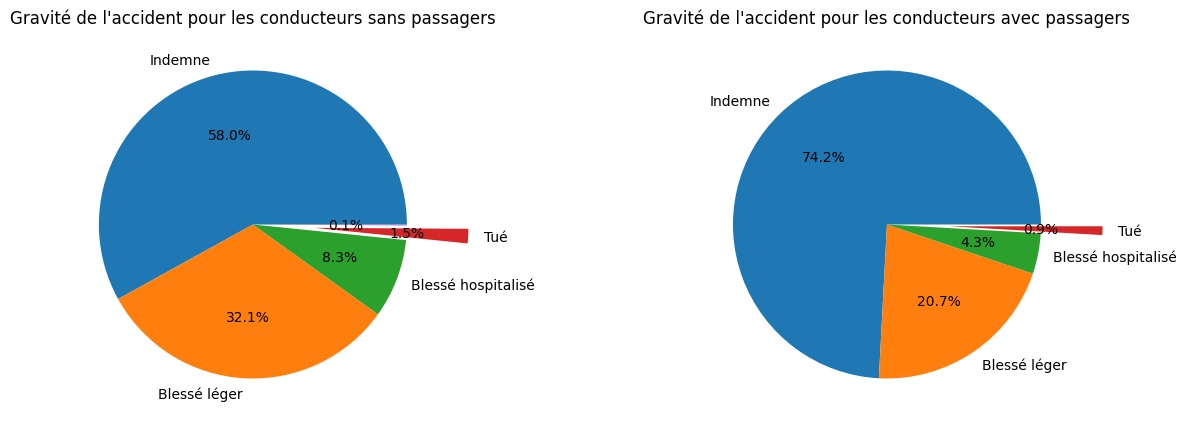

In [95]:
labels=['Indemne','Blessé léger','Blessé hospitalisé','Tué',""]
colors = ['#F5E56E','#3755A1','#F39C98','#5A6D9E',"#CCE7ED"]

fig, axes = plt.subplots(ncols=2, figsize=(15,5))

ax = axes[0]
data_conduc = df_acc.loc[df_acc['place']==1]['grav'].loc[df_acc['occutc'] ==1]

ax.pie(data_conduc.value_counts(normalize =True)*100,
       labels = labels,  explode=[0,0,0,0.4,0],
       autopct='%1.1f%%')
ax.title.set_text("Gravité de l'accident pour les conducteurs sans passagers")

ax = axes[1]
data_passag = df_acc.loc[df_acc['place']==1]['grav'].loc[df_acc['occutc']>1]
ax.pie(data_passag.value_counts(normalize =True)*100, labels= labels[:4], explode=[0,0,0,0.4],
       autopct='%1.1f%%' )
ax.title.set_text("Gravité de l'accident pour les conducteurs avec passagers")

Les conducteurs sont plus responsables donc génerent des accidents moins graves lorsqu'il y a aussi des passagers dans le véhicule, il est probable que cela s'explique car les conducteurs ayant des passagés font plus attention tel que lorsqu'ils sont en famille

# Comparaison des points de chocs initial

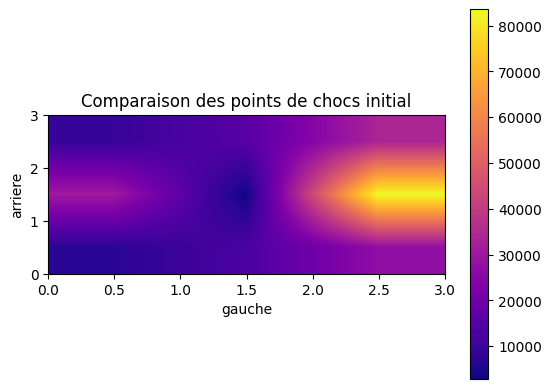

In [30]:
choc_dic = df_acc['choc'].value_counts().to_dict()
chocs = [0]*3
lst= []
lst.append(choc_dic.get(6))
lst.append(choc_dic.get(8))
lst.append(choc_dic.get(3))
chocs[0] =lst
lst =[]
lst.append(choc_dic.get(4))
lst.append(choc_dic.get(9))
lst.append(choc_dic.get(1))
chocs[1] =lst
lst =[]
lst.append(choc_dic.get(5))
lst.append(choc_dic.get(7))
lst.append(choc_dic.get(2))
chocs[2]=lst

plt.xlabel('gauche')
plt.ylabel('arriere')
plt.title('Comparaison des points de chocs initial')
plt.imshow(np.array(chocs), cmap='plasma', interpolation='bilinear',extent=[0,3,0,3],aspect =0.4)
plt.colorbar()

Sur ce graphe de comparaison des points de chocs initial,
On à décidé que:
 - L'avant serait à droite
 - L'arriere serait à gauche
 - Le milieu du graphe serait lorsque la voiture fait des tonneaux<br>
 
On peut remarquer ici que les accident se font pour la majorité sur l'avant de la voiture mais aussi un peu a l'arriere cependant il y a peu d'accident impliquant un tonneau

In [105]:
df_acc['place'].value_counts(normalize=True)*100

 1     78.137300
 2     11.468790
 10     3.988885
 3      1.991889
 4      1.800828
 9      0.927222
 7      0.832755
 5      0.440845
 8      0.298720
 6      0.105105
-1      0.007659
Name: place, dtype: float64

<AxesSubplot: >

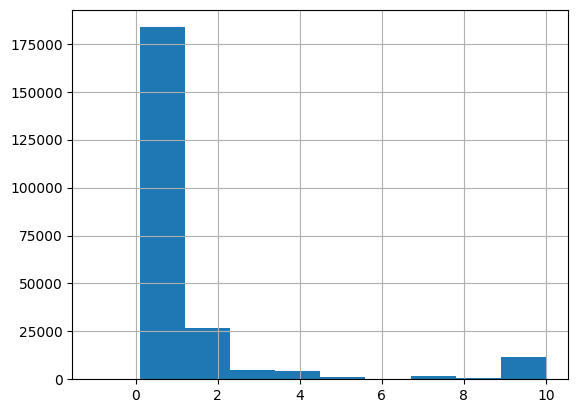

In [102]:
df_acc['place'].hist()

Les places les plus à risque sont ceux sur les coins du véhicule, à l'inverse les places les plus sécurisés sont celles au centre du véhicule.
La place conducteur et passager avant sont les plus à risques avec respectivement 78% et 11.5% d'implications dans les accidents de voitures.

# Accident selon la manoeuvre effectuée

(235003, 36)


<AxesSubplot: title={'center': 'Manoeuvre'}, ylabel='manv'>

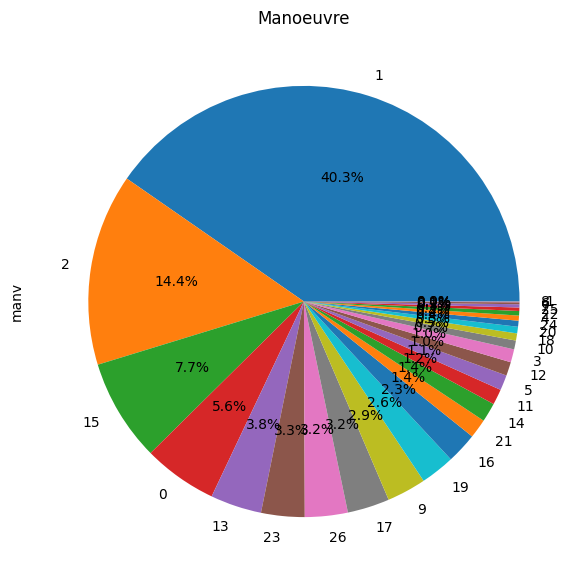

In [31]:
data = df_acc.loc[df_acc['lat'] > 0].loc[df_acc['long'] > -10]
print(data.shape)
data = data['manv'].value_counts(normalize=True) * 100
data.plot.pie(title = 'Manoeuvre',
       autopct='%1.1f%%',figsize = (7,7))

###### Répartition des accidents selon la manoeuvre

1  : Sans changement de direction<br>
2  : Meme sens même file<br>
15 : Tournant a gauche<br>
0  : Inconnus<br>
13 : Déportement à gauche<br>
23 : Arreté hors stationnement<br>
26 : Autre manoeuvre<br>
17 : Dépassement à gauche<br>
9  : En s'inserant<br>
19 : Traversant la chaussé<br>
16 : Tournant à droite<br>

#### Cas spécifique accident trottoir, avec véhicule à 2 roues

In [32]:
df_acc.loc[(df_acc['manv']==25) & ((df_acc['catv']> 30)& (df_acc['catv']<34))].shape[0]

47

Les accidents pour les manoeuvres de circulation sur trottoir pour les véhicule 2 roues sont faibles, cependant il est tout de même très dangereux de circuler sur le trottoir avec un véhicule 2 roues a moteur; Au vu du nombre de personnes qui circules sur les trottoir avec des véhicules 2 roues a moteurs je pensais que les accidents seraient plus représentés

# Plus 

In [97]:
df_acc.loc[df_acc['place']!=1]['trajet'].value_counts()

 5    24295
 0    13629
 9     4615
 4     2632
 1     2148
 3     2091
 2     1852
-1      116
Name: trajet, dtype: int64

In [96]:
df_acc.loc[df_acc['place']==1]['trajet'].value_counts()

 5    55988
 0    46659
 1    31219
 4    21679
 9    14765
-1     5692
 3     5155
 2     2468
Name: trajet, dtype: int64

Le motif de déplacement ayant le plus d'accidents est '5 : Promenade – loisirs', les automobilistes génèrent plus d'accidents.

In [107]:
df_acc['catv'].value_counts()#.hist(bins=100)

 7     149740
 10     17348
 33     14897
 1      11352
 2       6935
 30      6267
 32      4336
 31      3123
 50      3000
 15      2587
 14      1819
 34      1807
 17      1769
 37      1654
 43      1308
 3       1173
 80      1023
 99      1002
 13       951
 21       581
 60       468
 0        430
 38       384
 40       306
 36       278
 20       218
 16        98
 39        83
 35        32
 41        20
-1          9
 42         5
Name: catv, dtype: int64

Les catégories du véhicule semblent être conformes à la distribution des véhicules les plus utilisés en France avec :


07 – VL (véhicule léger) seul  
10 – VU (véhicule utilitaire) seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)  
33 – Motocyclette > 125 cm3  
01 – Bicyclette  

# Prédictions

In [37]:
import time

def timeit(f):
    def timed(*args, **kw):
        ts = time.time()
        result = f(*args, **kw)
        te = time.time()
        print('\tTime taken :  %2.2f s'%(te-ts))
        #print ('%r (%r, %r) %2.2f sec' % (f.__name__, args, kw, te-ts))
        return result
    return timed

In [38]:
df_acc_d = df_acc.drop('hrmn',axis=1).drop('occutc',axis=1).drop('obs',axis=1).drop('an_nais',axis=1)

Avant de commencer, on a décidé de séparer la colonne hrmn (heure,minute) en 2 colonnes.   
On supprime aussi les données hrmn, occutc (nombre d'occupant), obs(obstacle) et an_nais car elle possède des valeurs null

### Les Corrélations les plus fortes

In [39]:
corr_mat = df_acc_d.corr()
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat = sorted_mat.drop_duplicates()[sorted_mat !=1][sorted_mat > 0.2]
print("Possitivement corrélés")
print(sorted_mat)
corr_mat = df_acc_d.corr()
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat = sorted_mat.drop_duplicates()[sorted_mat !=1][sorted_mat < -0.2]
print("\n--------\nNégativement corrélés")
print(sorted_mat)

Possitivement corrélés
agg    vosp     0.203492
sexe   catu     0.205998
locp   col      0.206529
situ   vosp     0.218139
agg    int      0.221048
place  col      0.227917
surf   atm      0.262533
catr   agg      0.503272
catu   locp     0.541179
place  locp     0.660922
catu   place    0.849181
dtype: float64

--------
Négativement corrélés
long  lat   -0.291222
obsm  col   -0.281931
dtype: float64


### Les Corrélations avec la gravité de l'accident

In [40]:
df_corr = df_acc.corr(numeric_only= True)['grav']
df_corr.sort_values( ascending=False)

grav       1.000000
catu       0.171719
sexe       0.159899
place      0.153631
locp       0.123446
secu2      0.120695
secu1      0.100895
an_nais    0.086939
obs        0.067725
trajet     0.034020
secu3      0.031720
situ       0.031340
catr       0.029073
plan       0.027116
lum        0.020814
col        0.015300
prof       0.011416
long       0.010073
surf       0.007309
manv       0.005134
minute     0.003925
atm        0.003471
catv       0.003076
agg        0.002697
vosp       0.001744
infra      0.000802
int       -0.001106
jour      -0.002119
mois      -0.003825
circ      -0.011908
lat       -0.013778
heure     -0.015526
choc      -0.020031
obsm      -0.047592
occutc    -0.052979
Name: grav, dtype: float64

On a supprimé les colonnes qui contenaient des Nan et la colonne des HeuresMinutes pour ne pas nous gêner lors de la régression

## Premier test de Regression

In [41]:
x = df_acc_d.loc[:,df_acc_d.columns!='place']
y = df_acc_d['place']

In [42]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.75)

In [109]:
@timeit
def test_model(model, train_x,test_x,train_y,test_y, n_repet):
    pred = list()
    for i in range(n_repet):
        
        reg=model.fit(train_x,train_y)
        pred.append(mean_squared_error(test_y,reg.predict(test_x)))
    return "\tPerte moyenne : "+ str (np.array(pred).mean()) + " Ecart-type: " + str(np.array(pred).std())
print(" Regression Linéaire ")
print(test_model(LinearRegression(),train_x,test_x,train_y,test_y,10))

 Regression Linéaire 
	Time taken :  1.88 s
	Perte moyenne : 0.92875186787566 Ecart-type: 0.0


In [44]:

print(" Decision Tree Regression")
from sklearn import tree
print(test_model(tree.DecisionTreeRegressor(), train_x,test_x,train_y,test_y, 5 ))

print("\nNearest Neighbors Regression (hyper-paramètre : k = 2, le nombre de voisins.)")
from sklearn.neighbors import KNeighborsRegressor
print(test_model(KNeighborsRegressor(n_neighbors=2), train_x,test_x,train_y,test_y, 5 ))

print("Nearest Neighbors Regression (hyper-paramètre : k = 5, le nombre de voisins.)")
from sklearn.neighbors import KNeighborsRegressor
print(test_model(KNeighborsRegressor(n_neighbors=5), train_x,test_x,train_y,test_y, 5 ))

print("\nLeast Angle Regression (hyper-paramètre : k = 2, le nombre de coefficients non null.)")
from sklearn import linear_model
print(test_model( linear_model.Lars(n_nonzero_coefs=5, normalize=False),train_x,test_x,train_y,test_y, 5 ))

print("Least Angle Regression (hyper-paramètre : k = 5, le nombre de coefficients non null.)")
from sklearn import linear_model
print(test_model( linear_model.Lars(n_nonzero_coefs=5, normalize=False),train_x,test_x,train_y,test_y, 5 ))

 Decision Tree Regression
	Time taken :  5.84 s
	Perte moyenne : 0.6432339433399401 Ecart-type: 0.005746968638831846

Nearest Neighbors Regression (hyper-paramètre : k = 2, le nombre de voisins.)
	Time taken :  26.51 s
	Perte moyenne : 3.0864964000612756 Ecart-type: 0.0
Nearest Neighbors Regression (hyper-paramètre : k = 5, le nombre de voisins.)
	Time taken :  26.68 s
	Perte moyenne : 2.6345771135810456 Ecart-type: 0.0

Least Angle Regression (hyper-paramètre : k = 2, le nombre de coefficients non null.)
	Time taken :  0.30 s
	Perte moyenne : 0.9743423737182366 Ecart-type: 0.0
Least Angle Regression (hyper-paramètre : k = 5, le nombre de coefficients non null.)
	Time taken :  0.27 s
	Perte moyenne : 0.9743423737182366 Ecart-type: 0.0


Nous avons essayé plusieurs Regression et avons trouvé que Decision Tree Regression nous donne les meilleurs résultats avec une perte moyenne de 0.65~ 

## Classification

In [45]:
def accuracy(y_pred, y_test):
    return len(np.where(y_pred == y_test)[0])/len(y_test)*100

In [46]:
X_train,X_test,y_train,y_test =train_x,test_x,train_y,test_y

@timeit
def test_classif(clf, train_x,test_x,train_y,test_y):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    print(">Accuracy : ",accuracy(y_pred,test_y))

In [47]:

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
from sklearn.linear_model import SGDClassifier

print("Stochastic Gradient Descent")
test_classif(SGDClassifier(loss="hinge", penalty="l2", max_iter = 20), train_x,test_x,train_y,test_y)
test_classif(SGDClassifier(loss="hinge", penalty="l2", max_iter = 100), train_x,test_x,train_y,test_y)

from sklearn.naive_bayes import GaussianNB
print("\nGaussian Naive Bayes")
test_classif( GaussianNB(), train_x,test_x,train_y,test_y)


print("\nRandom Forest Classifier")
from sklearn.ensemble import RandomForestClassifier
test_classif( RandomForestClassifier(n_estimators=5), train_x,test_x,train_y,test_y)

Stochastic Gradient Descent
>Accuracy :  89.84357713060204
	Time taken :  4.31 s
>Accuracy :  91.01121683035183
	Time taken :  11.77 s

Gaussian Naive Bayes
>Accuracy :  83.0147571956222
	Time taken :  0.20 s

Random Forest Classifier
>Accuracy :  93.61883201988051
	Time taken :  0.86 s


Nous avons éssayé de faire une classification avec plusieurs models comme vous avez pu voir, on remarque donc que pour cette data frame que la Random Forest Classifier est la classification ayant la meilleure accuracy